<p style = "font-family:Times New Roman;font-size:200%;text-align:left;color:white;">Importing Libraries<p>


In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pickle
import app.utils

import warnings; warnings.filterwarnings( 'ignore' )

<p style = "font-family:Times New Roman;font-size:200%;text-align:left;color:white;">KPIs Preperation<p>


<p style = "font-family:Times New Roman;font-size:200%;text-align:left;color:white;">What KPIs should be collected ?<br><br> * Total No. of followers ?<br> * Total No. of posts ? <br> * Total NO. of impressions <br> * Total No. of likes ?<br> * Average of engagement rate ? <br> * Total Reach ? <p>


In [2]:
df = pd.read_csv( 'Data/Feature Engineered Data/Feature Engineered Data.csv' )

In [3]:
df

,post_id,media_type,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,...,traffic_source,engagement_rate,content_category,UPLOAD_DATE,Year,Month,Day,Hour,Day Name,Month Name
0,IG0000001,Reel,31627,7559,4530,6393,615036,1007750,1340,3,...,Home Feed,4.97,Technology,2024-11-30,2024,11,30,9,Saturday,November
1,IG0000002,Photo,63206,3490,1680,6809,1237071,1345900,1351,20,...,Hashtags,5.59,Fitness,2025-08-15,2025,8,15,9,Friday,August
2,IG0000003,Reel,94373,3727,1761,8367,1127470,1305369,242,24,...,Reels Feed,8.29,Beauty,2025-09-11,2025,9,11,9,Thursday,September
3,IG0000004,Reel,172053,7222,2875,9290,764030,897874,446,11,...,External,21.32,Music,2025-09-18,2025,9,18,9,Thursday,September
4,IG0000005,Video,99646,2703,4444,9746,7004,495406,1905,8,...,Profile,23.52,Technology,2025-03-21,2025,3,21,9,Friday,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,IG0029995,Video,46046,8354,3847,11095,597992,820688,1254,18,...,Reels Feed,8.45,Travel,2024-12-18,2024,12,18,9,Wednesday,December
29995,IG0029996,Carousel,67711,3266,458,12380,1908094,2218288,1427,4,...,Hashtags,3.78,Beauty,2025-05-05,2025,5,5,9,Monday,May
29996,IG0029997,Photo,52326,7328,3687,7619,1984066,2447893,713,4,...,Explore,2.90,Photography,2025-05-26,2025,5,26,9,Monday,May
29997,IG0029998,Carousel,158113,5890,2573,6329,1984709,2001092,1341,22,...,Explore,8.64,Technology,2025-08-02,2025,8,2,9,Saturday,August


In [4]:
def human_readable(n):
    if n >= 1_000_000_000:
        return f"{n/1_000_000_000:.0f}Bn"
    elif n >= 1_000_000:
        return f"{n/1_000_000:.0f}Mn"
    elif n >= 1_000:
        return f"{n/1_000:.0f}K"
    else:
        return str(n)

In [5]:
KPIs_dict = {
    'Total Followers' : human_readable( int( df['followers_gained'].sum(  ) ) ),
    'Total Posts' : human_readable( len( df ) ),
    'Total Likes' : human_readable( int( df['likes'].sum() ) ),
    'Total Impressions' : human_readable( int( df['impressions'].sum() ) ),
    'Average of engagement rate' : human_readable( int( df['engagement_rate'].mean() ) ),
    'Total Reach' : human_readable( int( df['reach'].sum() ) ),
    
}

In [6]:
KPIs_dict

{'Total Followers': '15Mn',
 'Total Posts': '30K',
 'Total Likes': '3Bn',
 'Total Impressions': '37Bn',
 'Average of engagement rate': '14',
 'Total Reach': '30Bn'}

<p style = "font-family:Times New Roman;font-size:200%;text-align:left;color:white;">Data Visualization<p>


In [7]:
df.columns

Index(['post_id', 'media_type', 'likes', 'comments', 'shares', 'saves',
       'reach', 'impressions', 'caption_length', 'hashtags_count',
       'followers_gained', 'traffic_source', 'engagement_rate',
       'content_category', 'UPLOAD_DATE', 'Year', 'Month', 'Day', 'Hour',
       'Day Name', 'Month Name'],
      dtype='object')

<p style = "font-family:Times New Roman;font-size:200%;text-align:left;color:white;">What Content do achieve the highest reach ? <p>


In [8]:
reach_by_content_category_df = df.groupby( 'content_category' )['reach'].sum().\
    sort_values( ascending=True ).to_frame().reset_index()
reach_by_content_category_df    

,content_category,reach
0,Travel,2932483597
1,Beauty,2945810876
2,Lifestyle,2949434508
3,Music,2971517003
4,Food,2993847359
5,Photography,3000287878
6,Technology,3009743033
7,Fashion,3021862310
8,Fitness,3027323244
9,Comedy,3043541689


In [9]:
instagram_palette = [
    "#1F6AE1",  # Blue
    "#3A5BDC",  # Blue-Purple
    "#5A4FD6",  # Indigo
    "#7A3FCB",  # Purple
    "#9B3CB4",  # Violet
    "#C13584",  # Magenta
    "#E1306C",  # Pink
    "#F56040",  # Orange
    "#FCAF45",  # Light Orange
    "#FFD166"   # Yellow
]

In [10]:
df['content_category'].nunique()

10

In [11]:
px.histogram( reach_by_content_category_df, x = 'reach', y = 'content_category', color = 'content_category',
             color_discrete_sequence= instagram_palette, template= 'simple_white', width = 600
             )

In [12]:
px.colors.sequential.Sunset


['rgb(243, 231, 155)',
 'rgb(250, 196, 132)',
 'rgb(248, 160, 126)',
 'rgb(235, 127, 134)',
 'rgb(206, 102, 147)',
 'rgb(160, 89, 160)',
 'rgb(92, 83, 165)']

In [13]:
os.listdir()

['.git',
 'app',
 'Artifacts',
 'Data',
 'EDA & Feature Engineering.ipynb',
 'Insta-logo.jpg',
 'Visualization.ipynb']

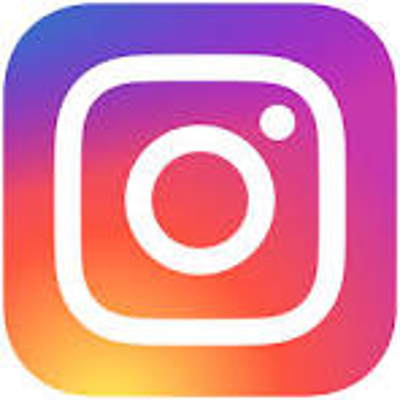

In [14]:
from PIL import Image
insta_img = Image.open( 'Insta-logo.jpg' ).resize( ( 400, 400 ) )
insta_img

In [15]:
df.columns

Index(['post_id', 'media_type', 'likes', 'comments', 'shares', 'saves',
       'reach', 'impressions', 'caption_length', 'hashtags_count',
       'followers_gained', 'traffic_source', 'engagement_rate',
       'content_category', 'UPLOAD_DATE', 'Year', 'Month', 'Day', 'Hour',
       'Day Name', 'Month Name'],
      dtype='object')

In [16]:
df['hashtags_count'].dtype

dtype('int64')

In [17]:
reach_by_hash_counts_df = df.groupby( 'hashtags_count' )['reach'].sum().to_frame().reset_index()
reach_by_hash_counts_df

,hashtags_count,reach
0,0,993906246
1,1,1003256971
2,2,994190851
3,3,982261790
4,4,932697707
5,5,1001681034
6,6,986373292
7,7,967894552
8,8,983275260
9,9,1002561348


In [18]:
df.columns

Index(['post_id', 'media_type', 'likes', 'comments', 'shares', 'saves',
       'reach', 'impressions', 'caption_length', 'hashtags_count',
       'followers_gained', 'traffic_source', 'engagement_rate',
       'content_category', 'UPLOAD_DATE', 'Year', 'Month', 'Day', 'Hour',
       'Day Name', 'Month Name'],
      dtype='object')

In [19]:
reach_and_caption_len_by_hashs_df =   df.groupby( 'hashtags_count' )[ [ 'reach', 'caption_length' ] ].sum().reset_index()
reach_and_caption_len_by_hashs_df.head()

,hashtags_count,reach,caption_length
0,0,993906246,1154364
1,1,1003256971,1111336
2,2,994190851,1067346
3,3,982261790,1100044
4,4,932697707,1049215


In [20]:
fig = go.Figure()

fig.add_bar(
    x = reach_and_caption_len_by_hashs_df['hashtags_count'],
    y = reach_and_caption_len_by_hashs_df['reach'],
    marker_color="#7A3FCB",
    name = 'Reach by Hashtags Count'
)

fig.add_scatter(
    x = reach_and_caption_len_by_hashs_df['hashtags_count'],
    y = reach_and_caption_len_by_hashs_df['caption_length'],
    mode = "lines+markers",
    yaxis= 'y2',
    name = 'Caption Length by Hashtags Count'
)
fig.update_layout(
    title="Relation between reach and caption length by hashtags count",
    xaxis_title="Hashtags count",

    yaxis=dict(
        title="Sum of reach",
        tickformat=".2s"
    ),

    yaxis2=dict(
        title="Sum of caption length",
        overlaying="y",
        side="right",
        tickformat=".2s"
    ),
    template = 'simple_white', bargap = 0.2,
    
    legend = dict(
        orientation = 'h', y = 1.1, x = 0.3
    )
    
)    

In [21]:
df.columns

Index(['post_id', 'media_type', 'likes', 'comments', 'shares', 'saves',
       'reach', 'impressions', 'caption_length', 'hashtags_count',
       'followers_gained', 'traffic_source', 'engagement_rate',
       'content_category', 'UPLOAD_DATE', 'Year', 'Month', 'Day', 'Hour',
       'Day Name', 'Month Name'],
      dtype='object')

In [22]:
px.histogram(df, x = 'traffic_source', y='followers_gained', color = 'traffic_source',
             color_discrete_sequence= instagram_palette[ 4 : 9 ], template = 'simple_white', text_auto=True)

In [23]:
df['Month Name']

0         November
1           August
2        September
3        September
4            March
           ...    
29994     December
29995          May
29996          May
29997       August
29998        April
Name: Month Name, Length: 29999, dtype: object

In [24]:
df['Month Name'] = pd.Categorical(
    values = df['Month Name'],
    categories= app.utils.months_order,
    ordered=True
)
df['Month Name'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 29999 entries, 0 to 29998
Series name: Month Name
Non-Null Count  Dtype   
--------------  -----   
29999 non-null  category
dtypes: category(1)
memory usage: 29.8 KB


In [26]:
followers_gained_by_month_df = df.groupby( 'Month Name' )['followers_gained'].sum()\
                                                         .to_frame().reset_index()
followers_gained_by_month_df

,Month Name,followers_gained
0,January,1301315
1,February,1132638
2,March,1257273
3,April,1268918
4,May,1302661
5,June,1267308
6,July,1289574
7,August,1237238
8,September,1182239
9,October,1252866


In [40]:
chart_followers_gained_by_month = px.line( followers_gained_by_month_df, x = 'Month Name', y = 'followers_gained',
        template = 'simple_white', markers = True, text='followers_gained', width = 900,)
chart_followers_gained_by_month.update_traces(
    texttemplate="%{y:.2s}",
    textposition="top center",
    line=dict(width=5, color = '#E1306C')
)
chart_followers_gained_by_month